# _import modules_

In [1]:
# enable In-Line MatPlotLib
%matplotlib inline

In [2]:
# import:
from matplotlib.pyplot import hist, title
from multiprocessing import cpu_count
from numpy import float, sqrt
from os import system
from pandas import Categorical, get_dummies, read_csv
from random import seed
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

system('pip install --upgrade git+git://GitHub.com/ChicagoBoothML/Helpy --no-dependencies')
from ChicagoBoothML_Helpy.EvaluationMetrics import mse, rmse

RANDOM_SEED = 99
seed(RANDOM_SEED)

# import Used Cars data set

In [3]:
# read Used Cars data into data frame
used_cars = read_csv(
    'https://raw.githubusercontent.com/ChicagoBoothML/DATA___UsedCars/master/UsedCars.csv',
    dtype=dict(
        price=float,
        trim=Categorical,
        isOneOwner=Categorical,
        mileage=float,
        year=float,
        color=Categorical,
        displacement=float,
        fuel=Categorical,
        region=Categorical,
        soundSystem=Categorical,
        wheelType=Categorical))

used_cars

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2988,320,f,193296,1995,Black,3.2,Gasoline,SoA,unsp,Alloy
1,6595,320,f,129948,1995,other,3.2,Gasoline,Mid,Premium,Alloy
2,7993,320,f,140428,1997,White,3.2,Gasoline,Mid,Bose,Alloy
3,5995,420,f,113622,1999,Silver,4.2,Gasoline,Mid,unsp,Alloy
4,3000,420,f,167673,1999,Silver,4.2,Gasoline,SoA,unsp,Alloy
5,7400,430,f,82419,2002,White,4.3,Gasoline,Mid,Bose,Alloy
6,10850,430,f,101264,2000,White,4.3,Gasoline,SoA,unsp,unsp
7,8990,430,f,110651,2001,Black,4.3,Gasoline,SoA,unsp,Alloy
8,7950,430,f,108173,2000,Silver,4.3,Gasoline,ESC,Bose,unsp
9,7995,430,f,119978,2000,Black,4.3,Gasoline,ESC,unsp,Alloy


Let's now split the data set into a Training set for fitting models and a Test set for evaluating them:

_(**note**: here we shall skip splitting a Validation set because we can use Out-of-Bag and Cross Validation RMSE estimates)_

In [4]:
used_cars_train, used_cars_test = train_test_split(
    used_cars,
    train_size=.8,
    random_state=RANDOM_SEED)

In [5]:
used_cars_train

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
17246,15000,430,f,83072,2005,Silver,4.3,Gasoline,SoA,unsp,Alloy
12228,33900,550,t,33976,2007,Silver,5.5,Gasoline,SoA,Harman Kardon,Alloy
6267,51995,550,t,16399,2013,unsp,4.6,Gasoline,Mid,Harman Kardon,Alloy
14924,58995,550,f,17000,2012,Black,4.6,Gasoline,New,Premium,Alloy
9499,30980,550,f,57514,2008,White,5.5,Gasoline,Pac,Harman Kardon,unsp
15656,17750,430,f,44087,2006,Blue,4.3,Gasoline,ENC,unsp,Alloy
14082,30850,550,f,71020,2007,unsp,5.5,Gasoline,Mid,unsp,unsp
1317,32995,550,f,82364,2008,other,5.5,Gasoline,WSC,unsp,Alloy
11422,10990,500,f,91577,2002,Silver,5.0,Gasoline,SoA,Bose,unsp
6305,8900,430,f,37500,2000,Black,4.3,Gasoline,ENC,unsp,unsp


In [6]:
used_cars_test

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
1203,56444,550,f,26334,2013,White,4.6,Gasoline,WSC,unsp,unsp
11046,68290,550,f,15367,2012,Black,4.6,Gasoline,SoA,Harman Kardon,Alloy
3054,10995,430,f,116733,2004,Silver,4.3,Gasoline,WSC,unsp,unsp
19279,60992,550,t,25809,2012,Black,4.6,Gasoline,SoA,unsp,unsp
3035,35862,400,f,75989,2010,White,3.5,Hybrid,SoA,Harman Kardon,Alloy
4894,49492,550,f,17232,2010,Gray,5.5,Gasoline,WSC,Premium,Alloy
10913,10995,55 AMG,f,136105,2002,Silver,5.4,Gasoline,Pac,Bose,Alloy
8583,53995,550,f,24482,2013,White,4.6,Gasoline,Mid,unsp,unsp
13134,15495,430,f,78491,2005,White,4.3,Gasoline,SoA,unsp,unsp
5076,13990,430,f,138719,2005,other,4.3,Gasoline,Mtn,unsp,Alloy


To sanity-check, let's plot the distributions of the _price_ variable in the 3 data sets:

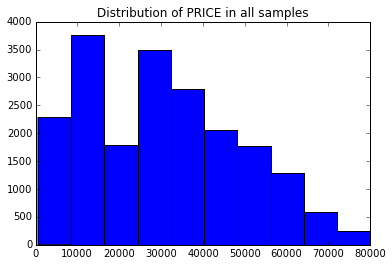

In [7]:
hist(list(used_cars.price))
title('Distribution of PRICE in all samples')

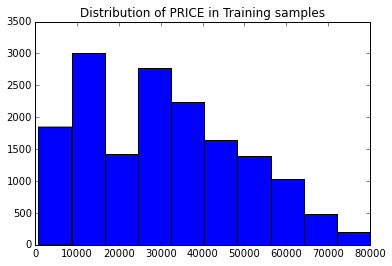

In [8]:
hist(list(used_cars_train.price))
title('Distribution of PRICE in Training samples')

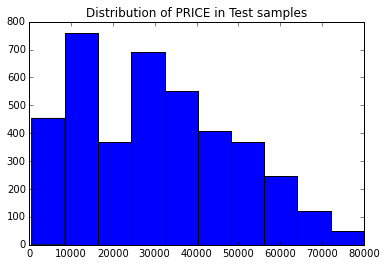

In [9]:
hist(list(used_cars_test.price))
title('Distribution of PRICE in Test samples')

# Random Forest models

In [10]:
B = 300

rf_model = RandomForestRegressor(
    n_estimators=B,
    criterion='mse',
    max_depth=None,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
    min_samples_split=60,
    min_samples_leaf=30,
    min_weight_fraction_leaf=0.0,
    max_features='auto',   # number of features to consider when looking for the best split; "auto": max_features=n_features
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    bootstrap=True,
    oob_score=True,   # estimate Out-of-Bag RMSE
    n_jobs=cpu_count() - 2,   # paralellize over all CPU cores but 2
    random_state=RANDOM_SEED,
    verbose=0,
    warm_start=False)

## Random Forest with 2 Predictors

In [11]:
rf_model.fit(X=used_cars_train[['mileage', 'year']], y=used_cars_train.price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=30,
           min_samples_split=60, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=6, oob_score=True, random_state=99,
           verbose=0, warm_start=False)

The estimated OOB RMSE of this Random Forest Model is:

In [12]:
# note that the "oob_score_" provided by SciKit is the estimated Out-of-Bag R^2
# from R^2 we can derive a rough RMSE
sqrt(used_cars_train['price'].var() * (1 - rf_model.oob_score_))

5395.4169888935858

The Test-set OOS RMSE is:

In [13]:
rmse(y_hat=rf_model.predict(used_cars_test[['mileage', 'year']]),
     y=used_cars_test.price)

5234.5403545179024

## Random Forest with Many Predictors

In [14]:
predictor_names =\
    ['trim', 'isOneOwner', 'mileage', 'year', 'color', 'displacement', 'fuel', 'region', 'soundSystem', 'wheelType']

In [15]:
rf_model.fit(X=get_dummies(used_cars_train[predictor_names]), y=used_cars_train.price)
    # (GET_DUMMIES expands the categorical variables)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=30,
           min_samples_split=60, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=6, oob_score=True, random_state=99,
           verbose=0, warm_start=False)

The estimated OOB RMSE of this Random Forest Model is:

In [16]:
# note that the "oob_score_" provided by SciKit is the estimated Out-of-Bag R^2
# from R^2 we can derive a rough RMSE
sqrt(used_cars_train['price'].var() * (1 - rf_model.oob_score_))

4498.1102471979184

The Test-set OOS RMSE is:

In [17]:
rmse(y_hat=rf_model.predict(get_dummies(used_cars_test[predictor_names])),
     y=used_cars_test.price)

4469.7817764304236

# Boosted Trees models

In [18]:
B = 1000

boost_model = GradientBoostingRegressor(
    n_estimators=B,
    loss='ls',   # Least-Squares objective loss function
    learning_rate=.01,   # shrinkage parameter
    subsample=1.0,
    min_samples_split=200,
    min_samples_leaf=100,
    min_weight_fraction_leaf=0.0,
    max_depth=10,   # maximum tree depth / number of levels of interaction
    init=None,
    random_state=RANDOM_SEED,
    max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
    alpha=0.9,   # NOT RELEVANT for Least-Squares loss function
    verbose=0,
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    warm_start=False)

## Boosted Trees with 2 Predictors

Based on the Training set, a Boosted Trees ensemble with 2 predictors has the following estimated OOS RSME:

In [19]:
def mse_score(estimator, X, y):
    y_hat = estimator.predict(X)
    return mse(y_hat, y)

sqrt(cross_val_score(
        boost_model,
        X=used_cars_train[['mileage', 'year']],
        y=used_cars_train.price,
        cv=KFold(n=len(used_cars_train),
                 n_folds=5,   # 5-fold cross validation
                 shuffle=True),
        scoring=mse_score).mean())

5395.4997805369521

And the Test-set OOS RMSE is:

In [20]:
boost_model.fit(X=used_cars_train[['mileage', 'year']], y=used_cars_train.price)

rmse(y_hat=boost_model.predict(used_cars_test[['mileage', 'year']]),
     y=used_cars_test.price)

5229.3123880159728

## Boosted Trees with Many Predictors

Based on the Training set, a Boosted Trees ensemble with many predictors has the following estimated OOS RSME:

In [21]:
sqrt(cross_val_score(
        boost_model,
        X=get_dummies(used_cars_train[predictor_names]),
        y=used_cars_train.price,
        cv=KFold(n=len(used_cars_train),
                 n_folds=5,   # 5-fold cross validation
                 shuffle=True),
        scoring=mse_score).mean())

4151.728042810646

And the Test-set OOS RMSE is:

In [22]:
boost_model.fit(X=get_dummies(used_cars_train[predictor_names]), y=used_cars_train.price)

rmse(y_hat=boost_model.predict(get_dummies(used_cars_test[predictor_names])),
     y=used_cars_test.price)

4092.6088109199077

Overall, this exercise shows the power of simple but extremely flexible trees-based methods such as Random Forest and Boosted Trees. When having many variables, all we have to do is to throw them into a trees ensemble!